# Homework 3

## Library and Data Import

1. Libraries `matplotlib.pyplot` and `pandas` are used.
2. Read file line by line as type `string`, clean up data using `string.split()` and `list(string)`.
3. Create a dataframe `df` from the cleaned-up data.
4. Create a numpy array of attributes from `df`.

In [167]:
import matplotlib.pyplot as plt
import pandas as pd

#Define column names
names = ['a', 'b', 'c', 'd', 'e']

# Format data in file
examples = []

with open('hw3_dataset.txt') as f:
    for line in f:
        x, y = line.split()
        examples.append(list(y))

# Load into a dataframe
df = pd.DataFrame(examples, columns=names)
attr = np.float32(df)

## Perceptron Learning

1. $h$ is originally calculated by `np.ceil()`, but to match the data type of ${c}$, 
   the result of ${x}\cdot{w}$ is compared with `0.0` as a Boolean expression.
2. ${w} = {w} + \eta(c - h){x}$
3. Always assume finish learning before every epoch. Change `learning` to `True` if any $c$ does not equal $h$.

In [168]:
def perceptron(x, c, eta):
    w = np.float32([0.2] * x.shape[1])
    pres = 0
    learning = True
    
    while learning:
        learning = False
        for i in range(n):
            h = (np.round(x[i, :] @ w, 2) > 0.0).astype(int)
            w = w + eta * (c[i] - h) * x[i, :]
            learning = learning or (c[i] != h)
        pres += 1
    
    return pres

## Problem 1


   eta  presentations
0  0.2             10
1  0.4             13
2  0.6              2
3  0.8             11 



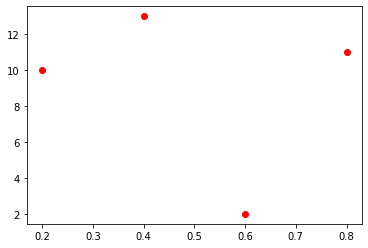

In [170]:
# Convert data into numpy arrays
x = np.concatenate([np.ones((20, 1)), attr], axis=1)
c = (np.sum(attr, axis=1) > 2).astype(int)

eta = [0.2, 0.4, 0.6, 0.8]

pres = [perceptron(x, c, e) for e in eta]

print(pd.DataFrame(zip(eta, pres), columns=['eta', 'presentations']), '\n')

plt.plot(eta, pres, 'ro')
plt.show()

## Problem 2

In [182]:
N = [1, 5, 10, 15, 20]
list_x = []

for n in N:    
    rand = np.random.randint(2, size=(20, n))
    x = np.concatenate([np.ones((20, 1)), attr, rand], axis=1)
    list_x.append(x)

eta = 0.2

pres = [perceptron(x, c, eta) for x in list_x]

print(pres)

[10, 3, 7, 5, 8]
